In [2]:
#import pandas as pd 
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.stats import norm

import sys, os
cwd = os.getcwd()
sys.path.append('../src/')




integers 6128
Feature: allHeaders
concept:  e98ab4fefd5ba42e c 4789 mu 379.98173809584756 sdev 2.2351749489161823


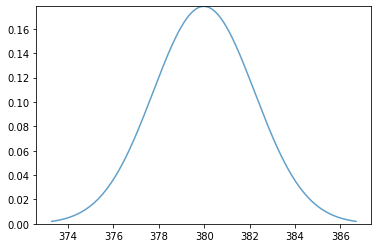

Feature: contentLength
concept:  914e929695b0c009 c 4688 mu 45.30402505935247 sdev 4.973222188538794
concept:  bd76532405970893 c 101 mu 62.51241850521795 sdev 1.4578316495865185


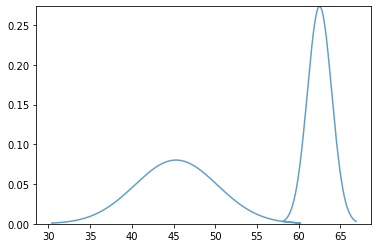

Feature: cookies
concept:  b949b62b78367139 c 4789 mu 32.989489132093574 sdev 1.5757324651579008


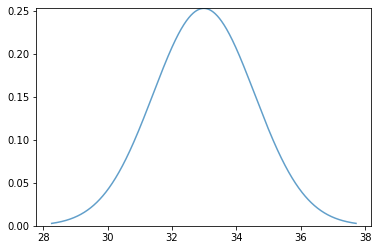

Feature: otherHeaders
concept:  e1570ebfcf065d54 c 4789 mu 290.99220193730315 sdev 1.5811263699087585


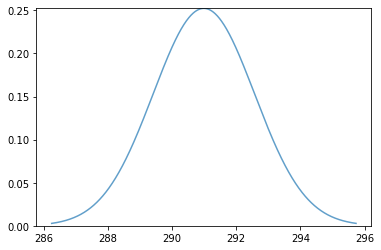

Feature: pathLength
concept:  a3beaf48d905550d c 4789 mu 0.9999449275109105 sdev 0.03758366184111197


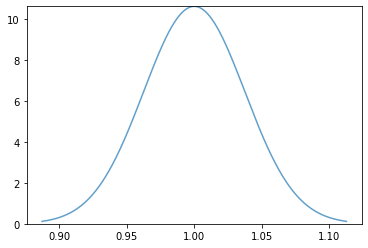

Feature: queryContent
concept:  6dbf0293b33f71ca c 3873 mu 13.049939259964393 sdev 1.6113449236512571
concept:  c8045dd876c8f255 c 916 mu 19.715594227451223 sdev 1.646280627672857


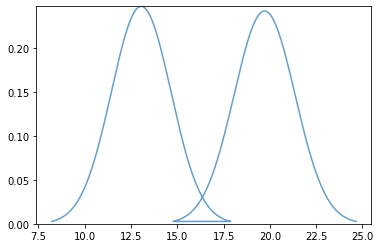

markers 0


In [40]:
import requests
res = requests.get('http://guardian-knative-guardian.sros-e621c7d733ece1fad737ff54a8912822-0000.us-south.containers.appdomain.cloud/display/tests.sample/envoy.gate')
status = res.json()
for key,modelerStatus in status.items():
    print (key, modelerStatus["_n"])
    del modelerStatus["_n"]
    for featureName, statusFeature in modelerStatus.items():
        print("Feature:", featureName)
        allx = []
        ally = []
        for concept, conceptStatus in statusFeature.items():
            c = conceptStatus["c"]
            s = conceptStatus["s"]
            s2 = conceptStatus["s2"]
            mu = s/c
            #print ("s2 / c", s2 / c, "mu ** 2", mu ** 2, "s2 / c - mu ** 2",s2 / c - mu ** 2)
            sigma = math.sqrt(max(1E-10,(s2 - s*mu)/c))
            print ("concept: ", concept, "c", c, "mu", mu, "sdev", sigma)
            x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
            allx.extend(x.tolist())
            y = norm.pdf(x, mu, sigma)
            ally.extend(y.tolist())
        fig, ax = plt.subplots()
        ax.plot(allx, ally,  alpha=0.7)
        ax.set_ylim([0, max(ally)])
        plt.show()
    
    

Merging concepts: ( 500 24.975 4.717 ) and ( 100 -0.029 4.577 )
Resulting concept: ( 600 20.807 10.434 )


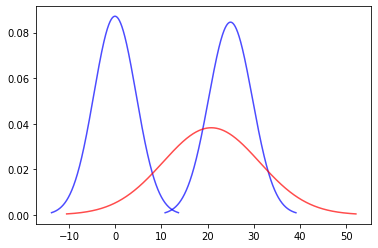

In [79]:
s_mu = [25,0]
s_sdev = [5,5]
        
color = ["blue", "blue", "red"]
c = [500, 100, 0]
s = [0, 0, 0]
s2 = [0, 0, 0]
mu = [0,0,0]
sdev = [0,0,0]

for i in range(2):
    samples = np.random.normal(s_mu[i], s_sdev[i], c[i])
    s[i] = sum(samples)
    s2[i] = sum(samples**2)

c[2]  = c[1]+c[0]
s[2]  = s[1]+s[0]
s2[2] = s2[1]+s2[0]


fig, ax = plt.subplots()

for i in range(3):
        mu[i] = s[i]/c[i]
        #print ("s2 / c", s2 / c, "mu ** 2", mu ** 2, "s2 / c - mu ** 2",s2 / c - mu ** 2)
        sdev[i] = math.sqrt((s2[i] - s[i]*mu[i])/c[i])
        x = np.linspace(mu[i] - 3*sdev[i], mu[i] + 3*sdev[i], 1000)
        y = norm.pdf(x, mu[i], sdev[i])
        ax.plot(x.tolist(), y.tolist(),  alpha=0.7, color=color[i])

print ("Merging concepts: (", c[0], round(mu[0], 3), round(sdev[0],3), ") and (", c[1], round(mu[1], 3), round(sdev[1],3), ")")
print ("Resulting concept: (", c[2], round(mu[2], 3), round(sdev[2],3), ")")


plt.show()

New markers
{'markers': ['test'], 'AllowLimit': 10, 'LearnLimit': 3, 'collectorId': 'mygate', 'minimumLearning': 1000}
Reset markers numFeatures 1
*** Markers *** Learn MEAN and SDEV
*** Markers *** Learn MEAN and SDEV - free slot 0
Finding Guassian in a range of 8.433694982295025 with  101 points
Best Gaussian 10.198512638009522 STD 1.202210673512829 explains 0.8815674571020125 of points
gaussian   99 10.198512638009522 1.202210673512829
99 10464.122653085098 1009.6254113001372 10.198236477779163 167.72395467124807 s2 - s*mu 167.72395467124807
recalc     99 10.198236477779163 1.202210673512829
max-min 6.379990617066689 6sdev 7.213264041076974 factor 0.9729284327883192
Drifted Gaussian 10.198236477779163 STD 1.202210673512829
test [ 1.01982365e+001 -1.79769313e+308 -1.79769313e+308 -1.79769313e+308] [1.20221067 1.         1.         1.        ] False 2 [0 0 0 0] [0. 0. 0. 0.] [0. 0. 0. 0.]
*** Markers *** Learn MEAN and SDEV - clear
*** Markers *** Learn MEAN and SDEV
*** Markers *** L

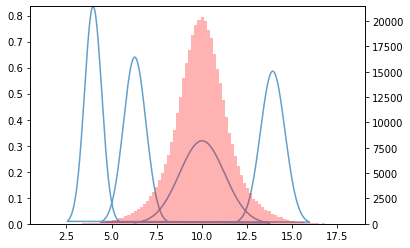

In [29]:
import Markers
m = Markers.Markers({
        "markers": ["test"]
      , "AllowLimit": 10
      , "LearnLimit": 3
      , "collectorId": "mygate"
      , "minimumLearning": 1000
})

points = []
for i in range(200000):
    points.append(random.gauss(10, 1))
    points.append(random.gauss(10, 2))

for p in points:
    m.assess( {"markers": [p]})
    m.learn()
    
allx = []
ally = []
status = {}
m.crdstore(status)
for key,val in status["markers"]["test"].items():
    #print(val)
    mu = val["s"]/val["c"]
    sigma = math.sqrt(val["s2"] / val["c"] - mu ** 2)
    print(mu, sigma)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
    allx.extend(x.tolist())
    y = norm.pdf(x, mu, sigma)
    ally.extend(y.tolist())
    
    
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax2.set_yscale('linear')
ax2.hist(points, 100,  color='red', alpha=0.3)
    
ax.plot(allx, ally,  alpha=0.7)
ax.set_ylim([0, max(ally)])
plt.show()


New markers
{'markers': ['test'], 'AllowLimit': 10, 'LearnLimit': 3, 'collectorId': 'mygate', 'minimumLearning': 1000}
Reset markers numFeatures 1
*** Markers *** Learn MEAN and SDEV
*** Markers *** Learn MEAN and SDEV - free slot 0
Finding Guassian in a range of 99.9438326227202 with  101 points
Best Gaussian 98.44147208310034 STD 1.4740983789250852 explains 0.19769658287336267 of points
gaussian   26 98.44147208310034 1.4740983789250852
26 250989.60588046597 2554.2089869951774 98.23880719212221 67.16167866095202 s2 - s*mu 67.16167866095202
recalc     26 98.23880719212221 1.4740983789250852
max-min 4.56875181266382 6sdev 8.844590273550512 factor 0.5682147887572805
Drifted Gaussian 98.23880719212221 STD 1.4740983789250852
mean is now [[ 9.82388072e+001 -1.79769313e+308 -1.79769313e+308 -1.79769313e+308]]
sdev is now [[1.47409838 1.         1.         1.        ]]
*** Markers *** Learn MEAN and SDEV - clear
*** Markers *** Learn MEAN and SDEV
*** Markers *** Learn MEAN and SDEV - free s

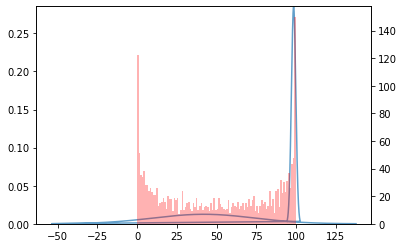

In [8]:
m = Markers.Markers({
        "markers": ["test"]
      , "AllowLimit": 10
      , "LearnLimit": 3
      , "collectorId": "mygate"
      , "minimumLearning": 1000
})

points = []
              
for i in range(2000):
    #points.append(random.gauss(100, 1))
    points.append(100*random.betavariate(0.5, 0.5))

for p in points:
    m.assess( {"markers": [p]})
    m.learn()
    
allx = []
ally = []
status = {}
m.crdstore(status)
for key,val in status["markers"]["test"].items():
    #print(val)
    mu = val["s"]/val["c"]
    sigma = math.sqrt(val["s2"] / val["c"] - mu ** 2)
    print(mu, sigma)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
    allx.extend(x.tolist())
    y = norm.pdf(x, mu, sigma)
    ally.extend(y.tolist())
    
    
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax2.set_yscale('linear')
ax2.hist(points, 100,  color='red', alpha=0.3)
    
ax.plot(allx, ally,  alpha=0.7)
ax.set_ylim([0, max(ally)])
plt.show()

New markers
{'markers': ['test'], 'AllowLimit': 10, 'LearnLimit': 3, 'collectorId': 'mygate', 'minimumLearning': 1000}
Reset markers numFeatures 1
*** Markers *** Learn MEAN and SDEV
*** Markers *** Learn MEAN and SDEV - free slot 0
Finding Guassian in a range of 29.57465263114708 with  101 points
Best Gaussian 40.82048954658325 STD 3.005334623677843 explains 0.06824743724792526 of points
gaussian   64 40.82048954658325 3.005334623677843
64 109024.08276611507 2622.2608628745174 40.972825982414335 1582.6447510618018 s2 - s*mu 1582.6447510618018
recalc     64 40.972825982414335 3.005334623677843
max-min 17.47644083872938 6sdev 18.03200774206706 factor 1.066108954564957
add points 65 41.11071521017768 5.0562081533585035
max-min 17.934432529783024 6sdev 30.33724892015102 factor 0.6502855890026801
add points 82 38.49718664449507 6.849450359631945
max-min 23.765333291530418 6sdev 41.09670215779167 factor 0.6361061897451334
add points 101 35.61977082507294 8.62611380910424
max-min 29.57465193

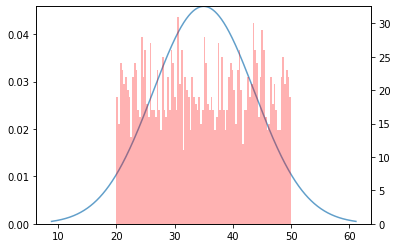

In [7]:
m = Markers.Markers({
        "markers": ["test"]
      , "AllowLimit": 10
      , "LearnLimit": 3
      , "collectorId": "mygate"
      , "minimumLearning": 1000
})

points = []
              
for i in range(2000):
    #points.append(random.gauss(100, 1))
    points.append(random.uniform(20, 50))

for p in points:
    m.assess( {"markers": [p]})
    m.learn()
    
allx = []
ally = []
status = {}
m.crdstore(status)
for key,val in status["markers"]["test"].items():
    #print(val)
    mu = val["s"]/val["c"]
    sigma = math.sqrt(val["s2"] / val["c"] - mu ** 2)
    print(mu, sigma)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
    allx.extend(x.tolist())
    y = norm.pdf(x, mu, sigma)
    ally.extend(y.tolist())
    
    
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax2.set_yscale('linear')
ax2.hist(points, 100,  color='red', alpha=0.3)
    
ax.plot(allx, ally,  alpha=0.7)
ax.set_ylim([0, max(ally)])
plt.show()

len(g.points) 160


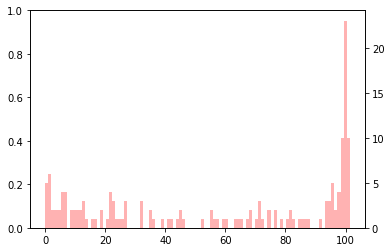

Finding Guassian in a range of 101.36055760222827 with  160 points
Best Gaussian 99.71591276621936 STD 0.8345464586407746 explains 0.2587525071937634 of points
gaussian   47 99.71591276621936 0.8345464586407746
47 466916.31202492636 4684.3612132441685 99.66725985625891 38.8657239395543 s2 - s*mu 38.8657239395543
recalc     47 99.66725985625891 0.8345464586407746
max-min 3.9183179618900255 6sdev 5.007278751844647 factor 0.8607768753619315
Drifted Gaussian 99.66725985625891 STD 0.8345464586407746
{'guassian': {'mu': 99.71591276621936, 'sdev': 0.8345464586407746, 'c': 47, 'explains': 0.2587525071937634}, 'driftedGuassian': {'mu': 99.66725985625891, 'sdev': 0.8345464586407746, 'c': 47, 'explains': 0.2587525071937634}}


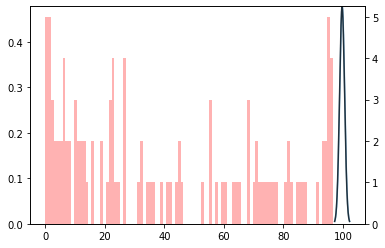

len(g.points) 113
Finding Guassian in a range of 101.36055760222827 with  113 points
Best Gaussian 5.091131032090021 STD 3.6208841415884265 explains 0.181197545013418 of points
gaussian   38 5.091131032090021 3.6208841415884265
38 2175.457695493401 231.73627966538191 6.098323149088998 762.2549767262403 s2 - s*mu 762.2549767262403
recalc     38 6.098323149088998 3.6208841415884265
max-min 15.897994477565005 6sdev 21.72530484953056 factor 0.804950450474318
add points 39 6.3591627893056835 4.704297767335204
max-min 16.256933159913533 6sdev 28.225786604011223 factor 0.6335563549312583
add points 41 6.9522901873153575 5.283101921902711
max-min 18.56468838189883 6sdev 31.698611531416265 factor 0.6442287606146235
add points 48 9.125301365053527 7.180859606314643
max-min 22.544798537112882 6sdev 43.08515763788786 factor 0.5755875050812486
add points 55 11.21640695749407 8.676501987168841
max-min 27.052835276326654 6sdev 52.059011923013045 factor 0.5716228123570002
add points 61 13.428590808439

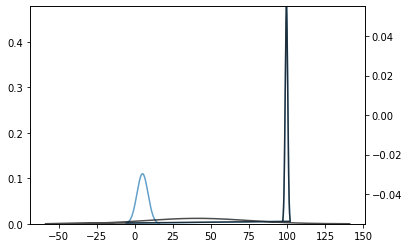

len(g.points) 0


In [5]:
import random
import gvu
g = gvu.gvu()
for i in range(40):
    g.addPoint(random.gauss(100, 1))
for i in range(120):
    g.addPoint(100*random.betavariate(0.5, 0.5))
for i in range(0):
    g.addPoint(random.gauss(-1000, 1))


    
    
print ("len(g.points)",len(g.points))
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax2.set_yscale('linear')
ax2.hist(g.points, 100,  color='red', alpha=0.3)

plt.show()

    
    
mu = [0 for i in range(10)]
sigma = [0 for i in range(10)]
dmu = [0 for i in range(10)]
dsigma = [0 for i in range(10)]
    


for i in range(10):
    result = g.getGuassian()
    if not result:
        break
    print (result)
    mu[i] = result["guassian"]["mu"]
    sigma[i] = result["guassian"]["sdev"]
    
    dmu[i] = result["driftedGuassian"]["mu"]
    dsigma[i] =  result["driftedGuassian"]["sdev"]
    
    allx = []
    ally = []
    dallx = []
    dally = []
    
    for j in range(i+1):
        # guassian
        x = np.linspace(mu[j] - 3*sigma[j], mu[j] + 3*sigma[j], 1000)
        allx.extend(x.tolist())
        y = norm.pdf(x, mu[j], sigma[j])
        ally.extend(y.tolist())
    
        # drifted
        x = np.linspace(dmu[j] - 3*dsigma[j], dmu[j] + 3*dsigma[j], 1000)
        dallx.extend(x.tolist())
        y = norm.pdf(x, dmu[j], dsigma[j])
        dally.extend(y.tolist())
        
    fig, ax = plt.subplots()
    ax2 = ax.twinx()
    ax2.set_yscale('linear')
    ax2.hist(g.points, 100,  color='red', alpha=0.3)
    
    ax.plot(allx, ally,  alpha=0.7)
    ax.plot(dallx, dally,  color='black', alpha=0.7)
    ax.set_ylim([0, max(ally)])
    plt.show()
    
    print ("len(g.points)",len(g.points))

Finding Guassian in a range of 8.851464258539316 with  100 points
Best Gaussian 10.2386715741113 STD 0.2590170104488848 explains 0.14729118912864086 of points
gaussian   29 10.2386715741113 0.2590170104488848
29 3062.6088437025337 297.8452745995303 10.27052671032863 3.5809953828925245 s2 - s*mu 3.5809953828925245
recalc     29 10.27052671032863 0.2590170104488848
max-min 1.3850440989973851 6sdev 1.5541020626933089 factor 0.9803400596848608
Drifted Gaussian 10.27052671032863 STD 0.2590170104488848
{'guassian': {'mu': 10.2386715741113, 'sdev': 0.2590170104488848, 'c': 29, 'explains': 0.14729118912864086}, 'driftedGuassian': {'mu': 10.27052671032863, 'sdev': 0.2590170104488848, 'c': 29, 'explains': 0.14729118912864086}}


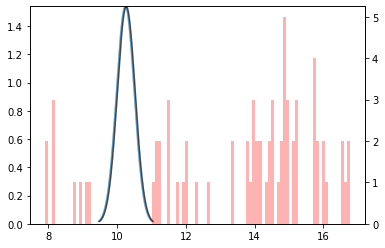

len(g.points) 71
Finding Guassian in a range of 8.851464258539316 with  71 points
Best Gaussian 14.789363666723219 STD 0.6750818677408408 explains 0.39980448832243126 of points
gaussian   48 14.789363666723219 0.6750818677408408
48 10797.521064545148 718.626397298673 14.971383277055688 38.6898375770179 s2 - s*mu 38.6898375770179
recalc     48 14.971383277055688 0.6750818677408408
max-min 3.3809426670070426 6sdev 4.050491206445045 factor 0.9181693637033711
Drifted Gaussian 14.971383277055688 STD 0.6750818677408408
{'guassian': {'mu': 14.789363666723219, 'sdev': 0.6750818677408408, 'c': 48, 'explains': 0.39980448832243126}, 'driftedGuassian': {'mu': 14.971383277055688, 'sdev': 0.6750818677408408, 'c': 48, 'explains': 0.39980448832243126}}


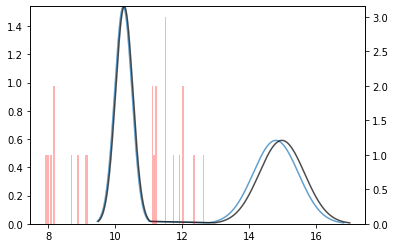

len(g.points) 23


In [6]:
import random
import gvu
g = gvu.gvu()
for i in range(50):
    g.addPoint(random.gauss(10, 1))
for i in range(50):
    g.addPoint(random.gauss(15, 1))

    
    
mu = [0 for i in range(10)]
sigma = [0 for i in range(10)]
dmu = [0 for i in range(10)]
dsigma = [0 for i in range(10)]
    


for i in range(10):
    result = g.getGuassian()
    if not result:
        break
    print (result)
    mu[i] = result["guassian"]["mu"]
    sigma[i] = result["guassian"]["sdev"]
    
    dmu[i] = result["driftedGuassian"]["mu"]
    dsigma[i] =  result["driftedGuassian"]["sdev"]
    
    allx = []
    ally = []
    dallx = []
    dally = []
    
    for j in range(i+1):
        # guassian
        x = np.linspace(mu[j] - 3*sigma[j], mu[j] + 3*sigma[j], 1000)
        allx.extend(x.tolist())
        y = norm.pdf(x, mu[j], sigma[j])
        ally.extend(y.tolist())
    
        # drifted
        x = np.linspace(dmu[j] - 3*dsigma[j], dmu[j] + 3*dsigma[j], 1000)
        dallx.extend(x.tolist())
        y = norm.pdf(x, dmu[j], dsigma[j])
        dally.extend(y.tolist())
        
    fig, ax = plt.subplots()
    ax2 = ax.twinx()
    ax2.set_yscale('linear')
    ax2.hist(g.points, 100,  color='red', alpha=0.3)
    
    ax.plot(allx, ally,  alpha=0.7)
    ax.plot(dallx, dally,  color='black', alpha=0.7)
    ax.set_ylim([0, max(ally)])
    plt.show()
    
    print ("len(g.points)",len(g.points))